# Predicción de click en anuncio

En este ejercicio vamos a intentar predecir quién hará click en un anuncio dadas una serie de características:

* '`Daily Time Spent on Site`': tiempo que pasa el cliente en el site
* '`Age`': edad del cliente
* '`Area Income`': Ganancia promedio por area de residencia del cliente
* '`Daily Internet Usage`': Promedio de uso diario de internet
* '`Ad Topic Line`': Titular del anuncio
* '`City`': Ciudad de residencia
* '`Male`': Si es hombre o no
* '`Country`': País de residencia
* '`Timestamp`': Fecha y hora en la que se realiza el click
* '`Clicked on Ad`': 0 o 1 indicando si pulso el anuncio

In [1]:
import pandas as pd

df = pd.read_csv("../data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [3]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# balance de muestras ?
display(df['Clicked on Ad'].value_counts(),
df['Clicked on Ad'].value_counts(normalize=True))

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

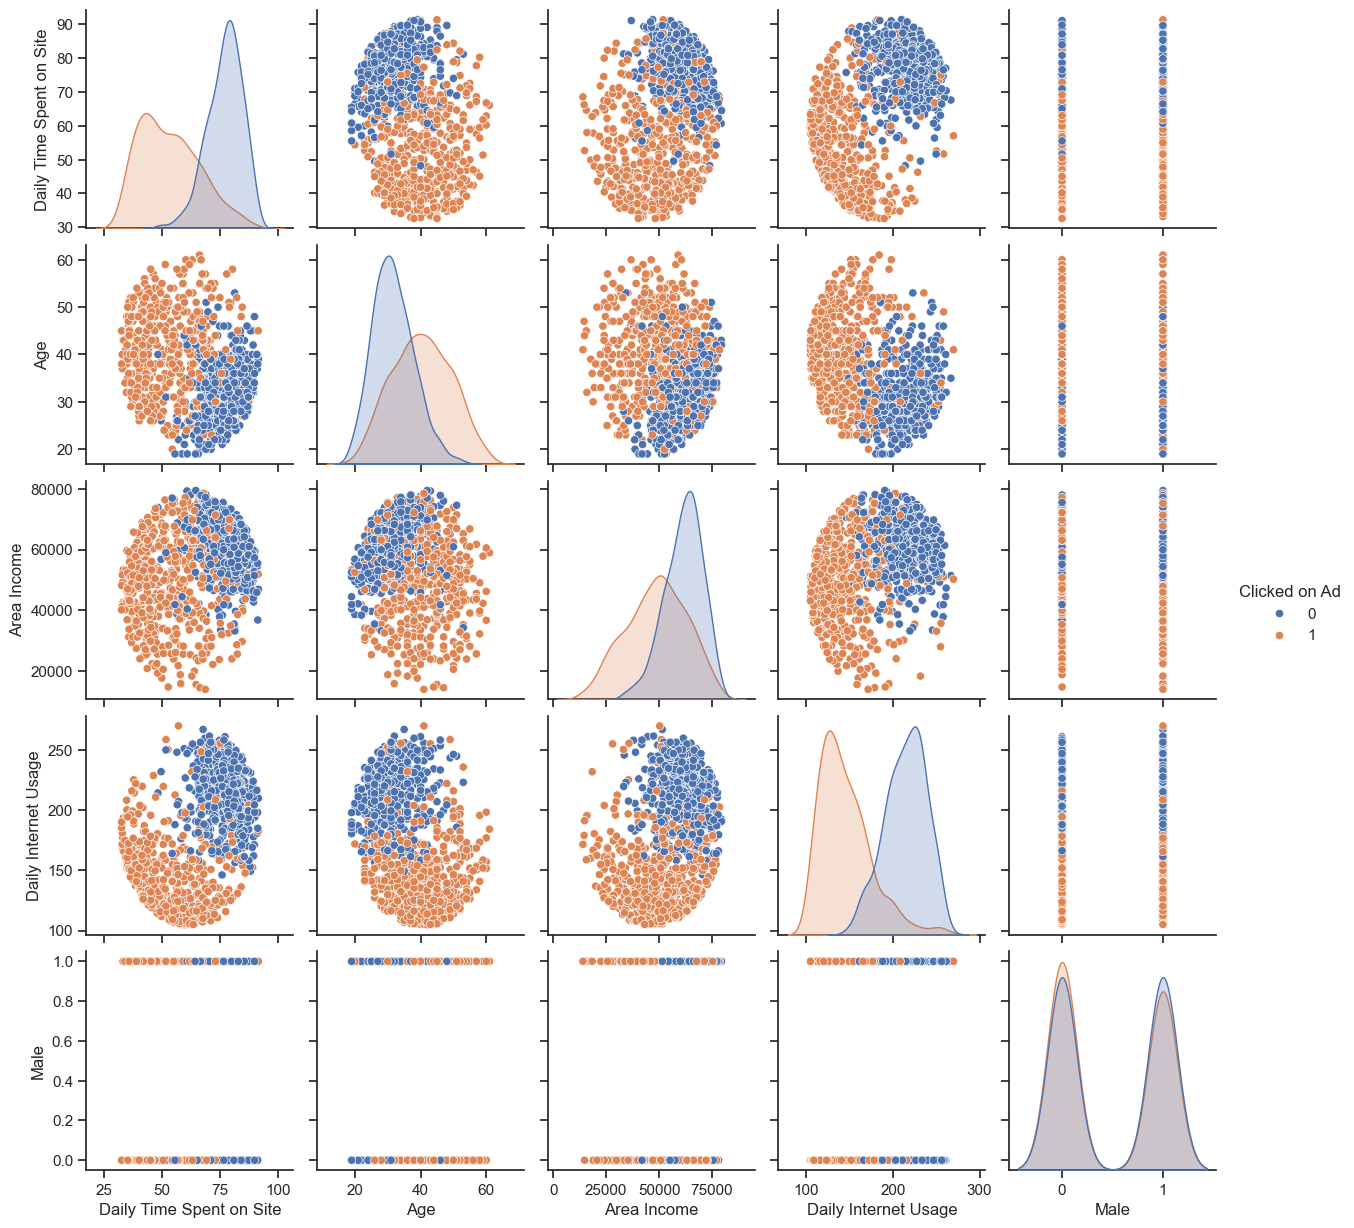

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df,
             hue='Clicked on Ad')

In [ ]:
import seaborn as sns

corr_mat = df

sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1);

SyntaxError: invalid syntax (3307016244.py, line 3)

# 2. Preparación de datos


In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


¿Qué hacemos con las variables no numáricas? 

In [4]:
df['Ad Topic Line'].str.split(" ")

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [5]:
lista_palabras = []
for topic in df['Ad Topic Line']:
    for palabra in topic.split(" "):
        lista_palabras.append(palabra.lower())

pd.Series(lista_palabras).value_counts()

interface          33
solution           29
system             24
user               24
secured            23
                   ..
static              4
persistent          4
profit-focused      4
intelligence        4
functionalities     4
Name: count, Length: 315, dtype: int64

Podemos buscar alguna palabra clave...

In [7]:
import numpy as np

df['Topic_solution'] = np.where(df['Ad Topic Line'].str.contains("solution"), 1, 0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


Sin embargo con las ciudades no podemos hacer eso. Suele ser habitual cuando tenemos una variable categórica finita (numero de ciudades que servimos) empleemos un codificación por etiquetas.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['City_encoded'] = encoder.fit_transform(df['City'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935


Otra técnica habitual es el empleo de atributos _dummy_ que no son más que las distintas categorías de una columna dada introducidas como features indicando 1 si el cliente pertenece a esa ciudad. Esta técnica puede generar conjuntos de datos muy grandes con información dispersa muy fácilmente.

In [10]:
pd.get_dummies(df['Country'], dtype=int)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Topic_solution', 'City_encoded'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Topic_solution            1000 non-null   int64  
 11  City_encoded              1000 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


Todavía tenemos que decidir qué hacer con las fechas (timestamp). Lo primero será convertirlas a datetime...

In [13]:
df['Timestamp'] = # ...

Podemos crear columnas correspondiente al día, mes, día de la semana, hora,...

In [14]:
df['month'] = # ...
df['month_day'] = # ...
df['week_day'] = # ...
df['hour'] = # ...
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded,month,month_dau,week_day,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805,6,3,4,3


Veamos cómo de balanceados están los datos en base a distintos atributos.

In [35]:
df.groupby('Topic_solution')['Clicked on Ad'].mean()

Topic_solution
0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

In [32]:
df.groupby('month')['Clicked on Ad'].mean()

month
1    0.469388
2    0.518750
3    0.474359
4    0.503401
5    0.537415
6    0.500000
7    0.495050
Name: Clicked on Ad, dtype: float64

In [33]:
df.groupby('hour')['Clicked on Ad'].mean()

hour
0     0.577778
1     0.500000
2     0.472222
3     0.547619
4     0.500000
5     0.477273
6     0.589744
7     0.481481
8     0.488372
9     0.571429
10    0.451613
11    0.600000
12    0.421053
13    0.500000
14    0.488372
15    0.542857
16    0.410256
17    0.560976
18    0.609756
19    0.487179
20    0.480000
21    0.395833
22    0.441860
23    0.409091
Name: Clicked on Ad, dtype: float64

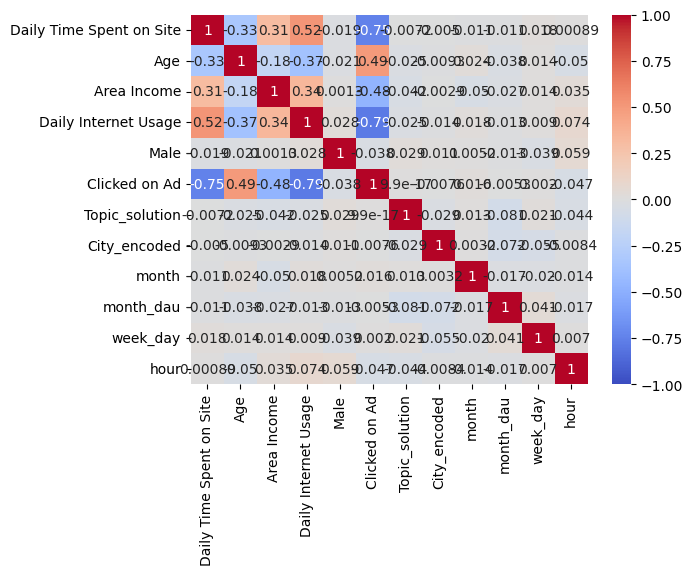

In [18]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1);

Tomaremos las columnas que nos interesen...

In [19]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Topic_solution', 'City_encoded', 'month',
       'month_dau', 'week_day', 'hour'],
      dtype='object')

In [20]:
features = # ...

X = df[features]
y = df['Clicked on Ad']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = # ...

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


Escalaremos los valores

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Y ahora construiremos nuestro modelo.

In [24]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

log_r.fit(X_train_scal, y_train)

y_pred = log_r.predict(X_test_scal)

In [25]:
log_r.score(X_test_scal, y_test)

0.95


Matriz de confusión.


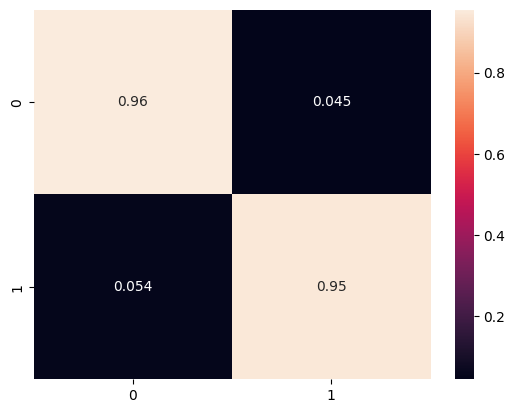

In [26]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

Curva ROC y área bajo la curva (AUC)

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

np.float64(0.9505010628606135)

In [30]:
from sklearn.metrics import roc_curve

y_pred_prob = log_r.predict_proba(X_test_scal)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"tpr":tpr, "fpr":fpr, "threshold":threshold})

,tpr,fpr,threshold
0,0.000000,0.000000,inf
1,0.009009,0.000000,0.999995
2,0.846847,0.000000,0.946610
3,0.846847,0.011236,0.932655
4,0.864865,0.011236,0.885341
5,0.864865,0.022472,0.877866
6,0.909910,0.022472,0.739909
7,0.909910,0.033708,0.730895
8,0.945946,0.033708,0.540375
9,0.945946,0.044944,0.537639


Text(0.5, 1.0, 'Curva ROC')

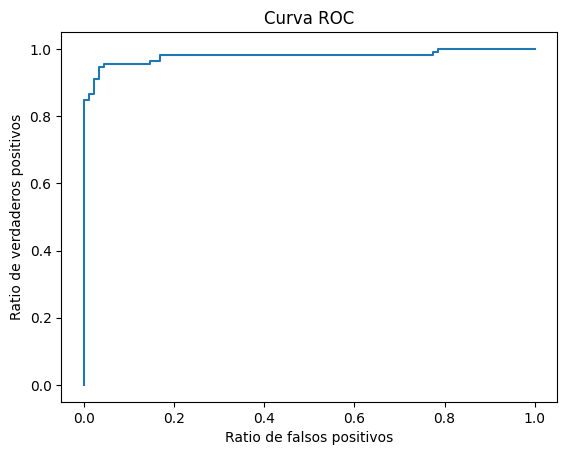

In [32]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.xlabel("Ratio de falsos positivos")
plt.ylabel("Ratio de verdaderos positivos")
plt.title("Curva ROC")

curva P-R

In [33]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"prec":prec[1:], "rec":rec[1:], "threshold":thresholds})[80:100]

,prec,rec,threshold
80,0.890756,0.954955,0.154704
81,0.898305,0.954955,0.167099
82,0.905983,0.954955,0.171075
83,0.913793,0.954955,0.183012
84,0.921739,0.954955,0.188278
85,0.929825,0.954955,0.205331
86,0.938053,0.954955,0.336713
87,0.946429,0.954955,0.408484
88,0.954955,0.954955,0.461044
89,0.963636,0.954955,0.483095


Text(0.5, 1.0, 'PR Curve')

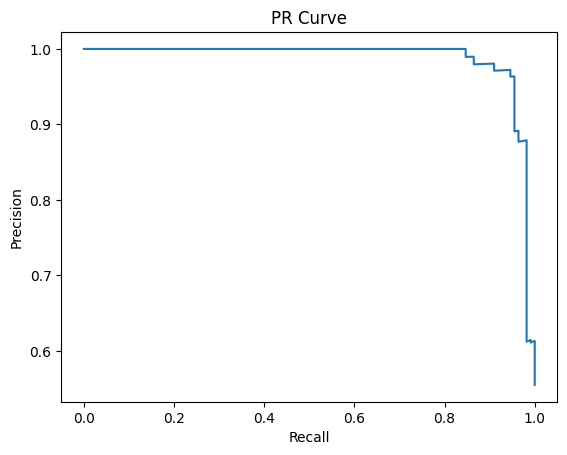

In [34]:
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title("PR Curve")